## 1.3. Сингулярное разложение

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import image

### Сингулярное разложение матрицы 

In [2]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [10,11,12.01]])

U, s, Vh = np.linalg.svd(A) # singular value decomposition A=U*Sigma*Vh

# U - matrix with right singular vetors in columns
# s - vector of singular values
# Vh - matrix with left singular vectors in rows

print ('A=', A)
print ()
print ('U=', U)
print()
print ('sigma=', s)
print()
print ('Vh=',Vh)
print()
print ('Condition =', s[0]/s[-1]) 
print ()


# reconstruct A 

n, m = A.shape
Sigma = np.eye (n,m)

for j in range (0,m):
    Sigma[j,j]=s[j]
           
Ar = U @ Sigma @ Vh

print (Ar)
print ()

print (np.allclose(A, Ar)) # check the result
print ()

# reconstruct matrix with cutoff for small singular values

AA = np.zeros (A.shape)

r = 2 # number of singular values taking into account

for i in range (0,r):
    AA +=s[i]*np.outer(U[:,i],Vh[i,:])
    
print (AA)
# if r = size of s then matrix AA is identical to original matrix A   

A= [[ 1.    2.    3.  ]
 [ 4.    5.    6.  ]
 [ 7.    8.    9.  ]
 [10.   11.   12.01]]

U= [[-1.40857707e-01  8.25725808e-01  3.62862688e-01 -4.08248290e-01]
 [-3.43885005e-01  4.25789858e-01 -1.83791821e-01  8.16496581e-01]
 [-5.46912303e-01  2.58539085e-02 -7.30446330e-01 -4.08248290e-01]
 [-7.50192737e-01 -3.69068372e-01  5.48634117e-01 -2.65885690e-13]]

sigma= [2.54672427e+01 1.28827170e+00 2.23979095e-03]

Vh= [[-0.5044406  -0.57440686 -0.64466769]
 [-0.76134647 -0.05629241  0.64589683]
 [ 0.40729747 -0.81663206  0.40892646]]

Condition = 11370.365919728192

[[ 1.    2.    3.  ]
 [ 4.    5.    6.  ]
 [ 7.    8.    9.  ]
 [10.   11.   12.01]]

True

[[ 0.99966897  2.00066371  2.99966765]
 [ 4.00016767  4.99966383  6.00016834]
 [ 7.00066636  7.99866395  9.00066902]
 [ 9.9994995  11.0010035  12.0094975 ]]


### Сингулярное разложение в задаче наименьших квадратов 

In [3]:
# consider the problem A*t=y

texact = np.array([1,1,1]) # define exact solution

# generate vector y

y = A @ texact
delta = 0.05 * np.random.randn(len(y))
y = y + delta

# Classical LS method

AT = A.T
G = AT @ A
z = AT @ y
tclassic = np.linalg.solve(G, z)

# SVD LS method

tsvd = np.zeros (len(texact))

r = 2 # number of singular values taking into account

for i in range (0,r):
    tsvd += 1./s[i] * U[:,i] @ y * Vh[i,:]
    
print ('texact', texact)
print ('tclassic', tclassic)
print ('tsvd', tsvd)

texact [1 1 1]
tclassic [ 2.47852549 -1.99637264  2.51107005]
tsvd [0.98511148 0.99792481 1.01168309]


### Псевдообратная матрица

In [4]:
# A+=V*Sigma+*Uh

SigmaPlus = np.eye (n,m)

for j in range (0,m):
    SigmaPlus[j,j]=1./s[j]

# constract pseudo inverse matrix from SVD: A+=V*Sigma+*Uh
Aplus1 = Vh.T @ SigmaPlus.T @ U.T
print (np.allclose(A, A@Aplus1@A)) # check the result
print ()

# construct pseudo inverse matrix from the original one: A+=(At*A)^-1*At
Aplus2 = np.linalg.inv(A.T @ A) @ A.T
print (np.allclose(A, A@Aplus2@A)) # check the result
print ()

# calculate pseudo inverse matrix with NumPy
Aplus3 = np.linalg.pinv(A)
print (np.allclose(A, A@Aplus3@A)) # check the result
print ()

print (Aplus1)
print ()

# solve LS problem

Aplus = np.linalg.pinv(A, rcond = 1e-2)

# Cutoff for small singular values 
# Singular values less than or equal to rcond * largest_singular_value are set to zero

tsvd2 = Aplus @ y
print ('tsvd2', tsvd2 )

True

True

True

[[  65.5         -33.66666667 -132.83333333  100.        ]
 [-132.33333333   67.          266.33333333 -200.        ]
 [  66.66666667  -33.33333333 -133.33333333  100.        ]]

tsvd2 [0.98511148 0.99792481 1.01168309]


### Сжатие изображений с помощью сингулярного разложения

In [5]:
def to_grayscale(img):
    return np.dot(img[..., :3], [0.3333, 0.3333, 0.3333])

(500, 500)
8.682444037204719e+18
(500, 500)


<Figure size 432x288 with 0 Axes>

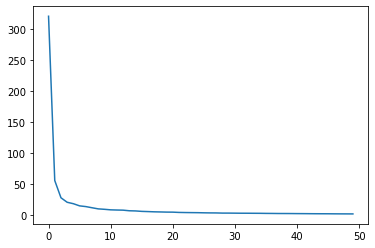

<Figure size 432x288 with 0 Axes>

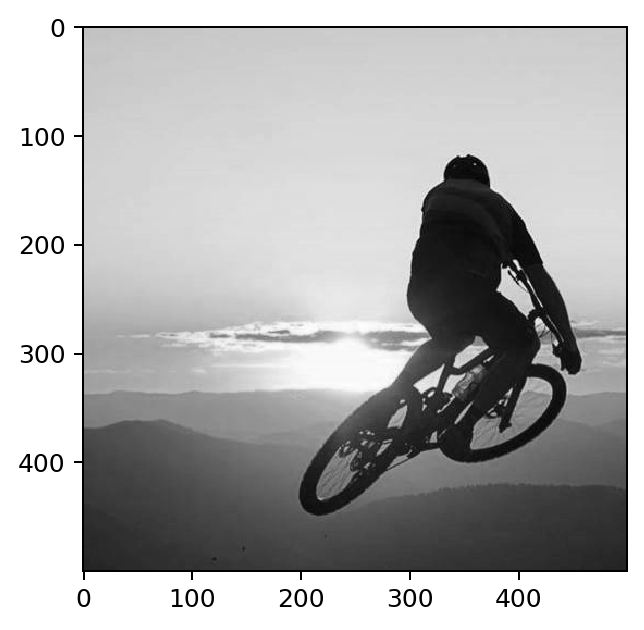

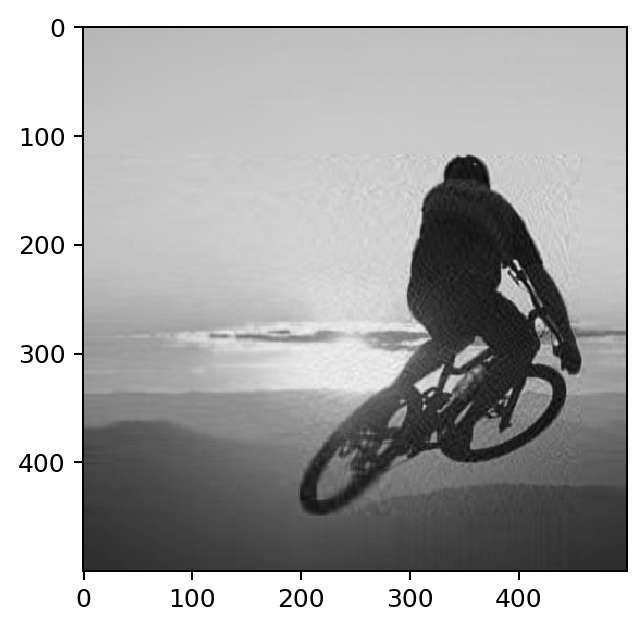

<Figure size 432x288 with 0 Axes>

In [6]:
path = '.\photo.png'

#path = '.\DSC_9616.jpg'

img = matplotlib.image.imread(path)
img = to_grayscale(img)

arr = np.array(img)
print (arr.shape)

cond = np.linalg.cond (arr)

print (cond)

U, s, Vh = np.linalg.svd(arr)

plt.plot (s[:50]) # present first 50 singular values
plt.figure ()

n, m = arr.shape

arrplus = np.zeros ((n,m))

r = 50 # number of singular values taking into account

for i in range (0,r):
    arrplus +=s[i]*np.outer(U[:,i],Vh[i,:])
    
print (arrplus.shape)

fig = plt.figure(dpi=180)
plt.imshow(arr, cmap='gray', interpolation='none')

fig = plt.figure(dpi=180)
plt.imshow(arrplus, cmap='gray', interpolation='none')

plt.figure()